# Implement SGD for binary classification by using logistic model
- Your Name: 雷宇
- Your ID: 2021141460073

# import necessary modules

* numpy for matrix calculation, `pip install numpy`
* matplotlib for plot figures, `pip install matplotlib`

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# prepare dataset D


1. load data `x` and `y` from the file `x.npy` and `y.npy`, respectively
2. adding bias term `1` to `x`


In [13]:
x = np.load("H5-x.npy")
print("original shape of x:{}".format(x.shape))
x = np.concatenate([x, np.ones((1,x.shape[1]))])
print("new shape of x:{}".format(x.shape))
y = np.load("H5-y.npy")
print("new shape of y:{}".format(y.shape))

original shape of x:(30, 569)
new shape of x:(31, 569)
new shape of y:(1, 569)


# implement the function below for logistic model

$a = \sigma (wx)$, where

- $x \in R^{31\times n}$
- $w \in R^{1\times 31}$
- $\sigma (z) = \frac{1}{1+e^{-z}}$

In [14]:
def sigmoid(z):
    #### Your code here ####
    a = z
    a = 1/(1 + np.exp(-a))
    ########################
    return a
def logisticModel(w, x):
    #### Your code here ####
    a = np.random.rand(1, 31)
    a = w @ x
    a = sigmoid(a)
    ########################
    return a

# define cost function and accuracy


$J= \frac{1}{m}\sum_{i=1}^{m}{\left[y^{i}\cdot \log(a^{i})+(1-y^{i})\cdot \log(1-a^{i})\right]}$

$\frac{\partial J}{\partial w} = \frac{1}{m}(a-y)x^{T}$


In [15]:
def cost(a, y):
    #### Your code here ####
    J = 0.0
    J = np.mean(y*np.log(a)+(1-y)*np.log(1-a))
    ########################
    return J

def grad(a, x, y):
    #### Your code here ####
    grad_w = np.zeros((a.shape[0], x.shape[0]))
    grad_w = (a - y) @ x.T
    ########################
    return grad_w
    
def accuarcy(a, y, tao=0.5):
    #### Your code here ####
    acc = 0.0
    r = 0.0
    for ai, yi in zip(a[0], y[0]):
        if ai >= tao and yi == 1: 
            r += 1
        if ai < tao and yi == 0: 
            r += 1
    acc = r/569
    ########################
    return acc



# gradient descent algorithm

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11004\2886310945.py:4: RuntimeWarning: divide by zero encountered in log
  J = np.mean(y*np.log(a)+(1-y)*np.log(1-a))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11004\2886310945.py:4: RuntimeWarning: invalid value encountered in multiply
  J = np.mean(y*np.log(a)+(1-y)*np.log(1-a))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11004\1991608307.py:4: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-a))


----------------------------------------
gradient descent method: w=[[ 2.17651175e+04  7.62111739e+03  1.15592211e+05  2.53244326e+04
   1.31566347e+02 -4.07270677e+02 -8.53698763e+02 -3.35508223e+02
   2.49701311e+02  1.25472579e+02 -1.42267680e+01  5.38612804e+02
  -2.86865588e+03 -6.73818299e+04 -1.06183484e+00 -1.22462343e+02
  -1.81446382e+02 -3.63910467e+01  3.55952183e-01 -5.89751954e+00
   2.35228037e+04  4.40888590e+03  1.07527596e+05 -4.49060459e+04
   1.08964611e+02 -1.52085572e+03 -2.25257340e+03 -5.45500154e+02
   1.53647480e+02  2.80708176e+01  2.88379755e+03]]
----------------------------------------


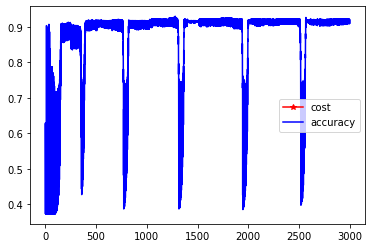

In [16]:
w = np.random.rand(1,31)

alpha = 0.1
Js = []
accs = []

# please test different K 
K = 3000

for i in range(K):
    a = logisticModel(w, x)
    grad_w = grad(a, x, y)
    w = w - alpha * grad_w
    Js.append(cost(a, y))
    accs.append(accuarcy(a, y))

plt.plot(Js,'r-*',label="cost")
plt.plot(accs,'b-',label="accuracy")
plt.legend()
plt.savefig("cost.jpg")
print("-"*40)
print("gradient descent method: w={}".format(w))
print("-"*40)   

In [17]:
accuarcy(logisticModel(w, x),y)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11004\1991608307.py:4: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-a))


0.9209138840070299